In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio as rio
#!pip3 install pyspatialml
import pyspatialml as pml
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

## Task 1: Read in the lsm_data2.csv table. Randomly split the data into training and testing sets. Roughly 66.6% should be used for training while 33.3% should be withheld for testing. This should be stratified by the “class” attribute.

In [7]:
data = pd.read_csv('lsm_data2.csv')
data

,class,slp,sp21,sp11,sp7,rph21,rph11,rph7,diss21,diss11,...,state_dist,local_dist,strm_dist,strm_cost,us_cost,state_cost,local_cost,steve,dspm,drain
0,not,4.856120,-2.560850,-0.799744,-0.338257,18.655701,2.116680,0.248973,0.042033,0.056310,...,6168.839844,0.000000,72.801102,86.637901,2239.270020,14990.799800,65.587799,4,1,1
1,not,4.914370,-0.353561,-0.027847,0.018600,4.788600,1.277920,0.473525,0.392066,0.421253,...,3517.290039,421.070007,534.603027,1660.099976,3253.659912,2088.399902,1857.839966,5,5,2
2,not,20.180100,2.668330,0.998749,0.579987,50.644299,13.606200,5.823730,0.805017,0.724216,...,2126.149902,167.630997,404.475006,4824.419922,31574.800780,6956.910156,871.179993,2,3,2
3,not,10.475900,-0.905396,-0.144409,-0.085815,22.777201,5.937540,2.204860,0.409448,0.475835,...,10896.299800,22.360701,56.568500,492.135010,17567.099610,45947.898440,275.951996,1,5,2
4,not,6.947190,-0.103668,-0.007324,0.045776,7.905890,1.993720,0.729704,0.468180,0.496475,...,70.710701,141.421005,117.046997,1064.140015,29078.699220,527.994995,845.005981,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,slopeD,30.374599,-0.576599,-0.385132,-0.143158,57.756401,19.053499,8.735710,0.424731,0.440541,...,1273.459961,327.566986,36.055500,619.645996,4626.350098,4626.350098,3269.000000,2,3,2
3496,slopeD,17.314100,-1.167660,-0.795044,-0.354919,82.811203,20.002300,8.233260,0.485182,0.522655,...,3797.290039,170.294006,332.415008,7010.450195,38195.500000,20406.800780,3986.020020,7,3,2
3497,slopeD,33.441200,-1.187440,-0.512360,-0.228333,143.190002,40.346699,16.355900,0.420849,0.437520,...,9158.519531,1996.500000,84.852799,1606.410034,14668.900390,14668.900390,11165.000000,4,3,2
3498,slopeD,35.916401,-1.415280,-0.221619,0.110046,132.307999,46.552898,21.676001,0.441269,0.520347,...,1412.089966,76.157700,72.801102,1777.619995,9850.280273,9850.280273,1679.359985,3,3,2


## Task 2: Split the data into Y and X components. The Y variable is the “class” attribute. All other attributes are the predictor or X variables.

In [33]:
x_data = data.loc[:, data.columns != 'class'] #select all columns except class and add to new df called x_data
x = x_data[:] #all columns from x_data are independent variables
y = data['class'] #dependent variable is the "class" attribute

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.333) #train model with 66.6% so train is 33.3%, train_test_split is random by default

print(y_train)
print(x_train)
print(y_test)
print(x_test)

1867    slopeD
1050       not
756        not
2197    slopeD
2747    slopeD
         ...  
3001    slopeD
1634       not
3043    slopeD
1318       not
2847    slopeD
Name: class, Length: 2334, dtype: object
            slp      sp21      sp11       sp7       rph21      rph11  \
1867  26.290199  1.007510  0.388031  0.365753   66.784103  19.060200   
1050   8.870610 -0.236694 -0.212631 -0.187088    4.958290   1.418610   
756    6.777390  1.506960  0.607574  0.262177    8.356020   2.066420   
2197  22.360599  0.634277  0.015442 -0.107910   52.177898  15.330800   
2747  27.735701 -0.529846  0.077881  0.108215   84.265404  27.019800   
...         ...       ...       ...       ...         ...        ...   
3001  31.018801 -2.052670 -1.011410 -0.407593   99.691101  38.612801   
1634  12.265300 -0.294617 -0.239655 -0.226471    5.294830   3.066230   
3043  34.698200 -1.147460 -0.540039 -0.203369  122.227997  44.035599   
1318  23.974501  0.195679  0.101929  0.048706   82.145302  23.566299   
28

## Task 3: Cerate subsets of the training and testing predictor variables as follows:
* All (All indexes)
* Just Terrain ([:,0:32])
* Just Lithology/Soils ([:,40:])
* Just Distance ([:,32:40])
* All Not Terrain ([:,32:])

In [38]:
x_train_all, x_test_all = x_train[:], x_test[:]
x_train_justTerrain, x_test_justTerrain = x_train.iloc[:,0:32], x_test.iloc[:,0:32]
x_train_justLithology, x_test_justLithology = x_train.iloc[:,40:], x_test.iloc[:,40:]
x_train_justDistance, x_test_justDistance = x_train.iloc[:,32:40], x_test.iloc[:,32:40]
x_train_notTerrain, x_test_notTerrain = x_train.iloc[:,32:], x_test.iloc[:,32:]

## Task 4: Train separate random forests models using each of the five predictor variable sets and the training samples. You do not need to optimize the hyperparameters.

In [39]:
rf1 = RandomForestClassifier(n_estimators=200)
rf_model1 = rf1.fit(x_train_all, y_train)

rf2 = RandomForestClassifier(n_estimators=200)
rf_model2 = rf2.fit(x_train_justTerrain, y_train)

rf3 = RandomForestClassifier(n_estimators=200)
rf_model3 = rf3.fit(x_train_justLithology, y_train)

rf4 = RandomForestClassifier(n_estimators=200)
rf_model4 = rf4.fit(x_train_justDistance, y_train)

rf5 = RandomForestClassifier(n_estimators=200)
rf_model5 = rf5.fit(x_train_notTerrain, y_train)

## Task 5: Generate confusion matrices and classification reports for each predictor variable set using the predictions on the test data and correct classifications.

In [57]:
pred_model1 = rf_model1.predict(x_test_all)
pred_model2 = rf_model2.predict(x_test_justTerrain)
pred_model3 = rf_model3.predict(x_test_justLithology)
pred_model4 = rf_model4.predict(x_test_justDistance)
pred_model5 = rf_model5.predict(x_test_notTerrain)

print("• Confusion Matrix and Classification Report: Model 1 (All):\n")
print(confusion_matrix(y_test, pred_model1))
print(classification_report(y_test, pred_model1))

print("• Confusion Matrix and Classification Report: Model 2 (Just Terrain):\n")
print(confusion_matrix(y_test, pred_model2))
print(classification_report(y_test, pred_model2))

print("• Confusion Matrix and Classification Report: Model 3 (Just Lithology/Soil):\n")
print(confusion_matrix(y_test, pred_model3))
print(classification_report(y_test, pred_model3))

print("• Confusion Matrix and Classification Report: Model 4 (Just Distance):\n")
print(confusion_matrix(y_test, pred_model4))
print(classification_report(y_test, pred_model4))

print("• Confusion Matrix and Classification Report: Model 5 (All Not Terrain):\n")
print(confusion_matrix(y_test, pred_model5))
print(classification_report(y_test, pred_model5))


• Confusion Matrix and Classification Report: Model 1 (All):

[[493  97]
 [ 65 511]]
              precision    recall  f1-score   support

         not       0.88      0.84      0.86       590
      slopeD       0.84      0.89      0.86       576

    accuracy                           0.86      1166
   macro avg       0.86      0.86      0.86      1166
weighted avg       0.86      0.86      0.86      1166

• Confusion Matrix and Classification Report: Model 2 (Just Terrain):

[[499  91]
 [ 71 505]]
              precision    recall  f1-score   support

         not       0.88      0.85      0.86       590
      slopeD       0.85      0.88      0.86       576

    accuracy                           0.86      1166
   macro avg       0.86      0.86      0.86      1166
weighted avg       0.86      0.86      0.86      1166

• Confusion Matrix and Classification Report: Model 3 (Just Lithology/Soil):

[[323 267]
 [192 384]]
              precision    recall  f1-score   support

         no

## Task 6: Calculate the AUC metric from the ROC curve for each predictor variable set using the probabilistic predictions on the test data and the correct classifications.

In [48]:
#predict_proba gives a prediction for both classes that sum to 1
rfc_prob1 = rf_model1.predict_proba(x_test_all) 
rfc_prob2 = rf_model2.predict_proba(x_test_justTerrain)
rfc_prob3 = rf_model3.predict_proba(x_test_justLithology)
rfc_prob4 = rf_model4.predict_proba(x_test_justDistance)
rfc_prob5 = rf_model5.predict_proba(x_test_notTerrain)

In [52]:
y_test_numpy = y_test.to_numpy()
my_dict = {"not":0, "slopeD":1} #the two classes in the class column 
y_test_array = np.asarray([my_dict[zi] for zi in y_test_numpy])

print("• AUC metric from ROC curve: Model 1 (All):")
print(roc_auc_score(y_test_array, rfc_prob1[:,1]))

print("• AUC metric from ROC curve: Model 2 (Just Terrain):")
print(roc_auc_score(y_test_array, rfc_prob2[:,1]))

print("• AUC metric from ROC curve: Model 3 (Just Lithology/Soil):")
print(roc_auc_score(y_test_array, rfc_prob3[:,1]))

print("• AUC metric from ROC curve: Model 4 (Just Distance):")
print(roc_auc_score(y_test_array, rfc_prob4[:,1]))

print("• AUC metric from ROC curve: Model 5 (All Not Terrain):")
print(roc_auc_score(y_test_array, rfc_prob5[:,1]))

• AUC metric from ROC curve: Model 1 (All):
0.9394979990583804
• AUC metric from ROC curve: Model 2 (Just Terrain):
0.9365421963276837
• AUC metric from ROC curve: Model 3 (Just Lithology/Soil):
0.6578478107344633
• AUC metric from ROC curve: Model 4 (Just Distance):
0.8300332509416196
• AUC metric from ROC curve: Model 5 (All Not Terrain):
0.8377368761770244


## Task 7: Generate an ROC Plot that includes the ROC curves for all five models. Each curve should use a different color and a legend should be provided.

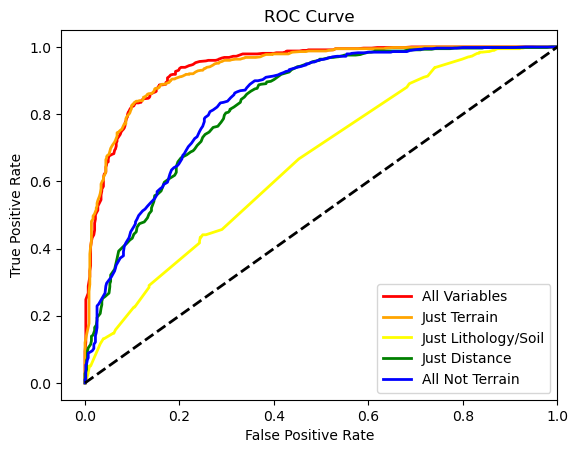

In [55]:
fpr1, tpr1, _ = roc_curve(y_test_array, rfc_prob1[:, 1])
fpr2, tpr2, _ = roc_curve(y_test_array, rfc_prob2[:, 1])
fpr3, tpr3, _ = roc_curve(y_test_array, rfc_prob3[:, 1])
fpr4, tpr4, _ = roc_curve(y_test_array, rfc_prob4[:, 1])
fpr5, tpr5, _ = roc_curve(y_test_array, rfc_prob5[:, 1])

plt.plot(fpr1,tpr1, color ='red', lw=2, label= "All Variables")
plt.plot(fpr2,tpr2, color ='orange', lw=2, label= "Just Terrain")
plt.plot(fpr3,tpr3, color ='yellow', lw=2, label= "Just Lithology/Soil")
plt.plot(fpr4,tpr4, color ='green', lw=2, label= "Just Distance")
plt.plot(fpr5,tpr5, color ='blue', lw=2, label= "All Not Terrain")

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Task 8: Provide a short write up focused on a comparison of the models based on the binary assessments and probabilistic assessments.

The ROC curve generated in Task 7 for each of the 5 models plots the false positive rate against true positive rate (sensitivity). Curves that trend to the upper-left corner of the plot indicate stronger performing models. So in this case, the "All Variables" and "Just Terrain", shown in red and orange. In Task 6, the area under the curve, or AUC, was calculated for each model. This value measures the ability of the classifier, in this case "class", to distinguish between classes. AUC statistics closer to 1 suggest stronger model performance. When looking at the calculated AUCs for each model, "All Variables" and "Just Terrain" both had the largest values (0.9394979990583804 and 0.9365421963276837 respectively). In constrast, "Just Lithology/Soil" has the flattest curve in the ROC Curves plot, indicating a weak performance. Further, this model logically had the lowest AUC score as well at 0.6578478107344633. 